<a href="https://colab.research.google.com/github/SwayamBhageria/Stock-price-prediction-using-LSTM/blob/main/Apple%20stock%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests
import json
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error



In [2]:
api_url = "https://financialmodelingprep.com/api/v3/historical-price-full/AAPL?apikey=25f7fed4fd1ac271bb4f327ed4e69a63"

# Make a GET request to the API
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the response JSON
    data = response.json()
else:
    print(f"Error: Unable to fetch data. Status code: {response.status_code}")
print(data)
df = pd.json_normalize(data, 'historical', ['symbol']) #convert into a datframe
df.tail()


{'symbol': 'AAPL', 'historical': [{'date': '2024-08-14', 'open': 220.57, 'high': 223.03, 'low': 219.7, 'close': 221.72, 'adjClose': 221.72, 'volume': 41960574, 'unadjustedVolume': 41960574, 'change': 1.15, 'changePercent': 0.52138, 'vwap': 221.255, 'label': 'August 14, 24', 'changeOverTime': 0.0052138}, {'date': '2024-08-13', 'open': 219.01, 'high': 221.89, 'low': 219.01, 'close': 221.27, 'adjClose': 221.27, 'volume': 44155331, 'unadjustedVolume': 44155331, 'change': 2.26, 'changePercent': 1.03, 'vwap': 220.295, 'label': 'August 13, 24', 'changeOverTime': 0.0103}, {'date': '2024-08-12', 'open': 216.07, 'high': 219.51, 'low': 215.6, 'close': 217.53, 'adjClose': 217.53, 'volume': 38028092, 'unadjustedVolume': 38028092, 'change': 1.46, 'changePercent': 0.67571, 'vwap': 217.1775, 'label': 'August 12, 24', 'changeOverTime': 0.0067571}, {'date': '2024-08-09', 'open': 212.1, 'high': 216.78, 'low': 211.97, 'close': 216.24, 'adjClose': 215.99, 'volume': 42201646, 'unadjustedVolume': 42201646, '

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol
1252,2019-08-22,53.30,53.61,52.69,53.12,51.40,89071276,89071276,-0.1825,-0.33771,53.1800,"August 22, 19",-0.003377,AAPL
1253,2019-08-21,53.25,53.41,52.90,53.16,51.44,86258988,86258988,-0.0875,-0.16901,53.1800,"August 21, 19",-0.001690,AAPL
1254,2019-08-20,52.72,53.34,52.58,52.59,50.89,107678116,107678116,-0.1300,-0.24659,52.8075,"August 20, 19",-0.002466,AAPL
1255,2019-08-19,52.66,53.18,52.51,52.59,50.89,97727660,97727660,-0.0675,-0.13293,52.7350,"August 19, 19",-0.001329,AAPL
1256,2019-08-16,51.07,51.79,50.96,51.63,49.95,115254496,115254496,0.5550,1.10000,51.3625,"August 16, 19",0.011000,AAPL


In [3]:
final_data = df[['open', 'date']][0:500] #forming filtered dataframe
input_sequences = []
labels = []

#Creating input and output data for time series forecasting
for i in range(len(final_data['open'])):
    if i > 1:
        labels.append(final_data['open'][i])
        input_sequences.append(final_data['open'][i-2:i+1].tolist())

#creating train test split
x_train = np.array(input_sequences[0:400])
x_test = np.array(input_sequences[400:])
y_train = np.array(labels[0:400])
y_test = np.array(labels[400:])


In [4]:
print(np.array(input_sequences[0:400]))


[[220.57 219.01 216.07]
 [219.01 216.07 212.1 ]
 [216.07 212.1  213.11]
 ...
 [132.03 133.88 131.25]
 [133.88 131.25 130.26]
 [131.25 130.26 130.47]]


In [ ]:
print(np.array(labels[0:400]))

[173.37 169.88 169.53 166.54 165.35 165.52 166.21 168.03 169.61 171.75
 175.36 174.26 168.34 168.8  168.7  169.03 169.59 170.29 168.79 169.08
 171.19 171.75 170.41 170.   170.57 171.76 177.05 175.72 174.34 175.57
 171.17 172.91 172.77 173.15 172.94 169.   169.15 171.06 170.76 176.15
 179.55 181.27 182.51 181.1  182.24 185.01 183.48 181.94 181.79 183.42
 183.55 185.32 185.77 188.42 188.65 189.39 190.64 186.86 188.15 179.86
 183.99 187.04 190.94 192.01 194.27 195.22 195.42 195.02 192.3  189.33
 186.09 181.27 182.16 186.06 186.54 184.35 183.92 182.09 181.99 182.15
 184.22 187.15 193.9  194.14 192.49 193.61 195.18 196.1  196.9  196.16
 196.09 197.53 198.02 195.09 193.08 193.11 194.2  193.63 194.45 190.21
 189.98 190.33 189.84 190.9  189.78 189.92 190.87 191.49 191.41 189.89
 190.25 189.57 187.85 187.7  185.82 183.97 182.96 182.35 179.18 176.38
 174.24 175.52 171.   169.35 169.02 166.91 170.37 171.88 173.05 170.91
 175.31 176.04 175.58 176.65 176.75 181.42 180.07 178.2  178.1  176.81
 173.8

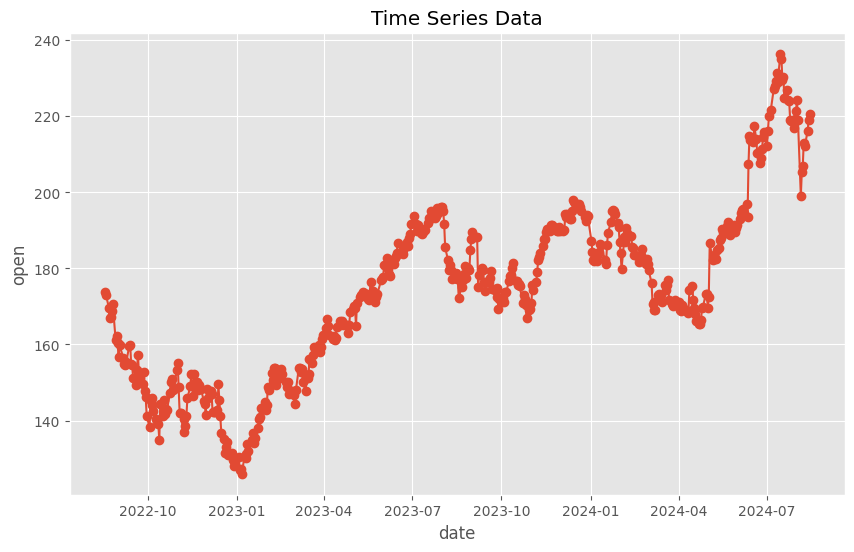

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['date'][0:500], df['open'][0:500], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('date')
plt.ylabel('open')
plt.title('Time Series Data')

# Display the plot
plt.grid(True)
plt.show()

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 40, batch_size = 64, validation_data = (x_test,y_test))

loss = model.evaluate(x_test, y_test)
prediction = model.predict(x_test)

ann_mse = mean_squared_error(y_test, prediction.flatten())
print(ann_mse)
ann_rmse = np.sqrt(ann_mse)
print(ann_rmse)


Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 32717.7402 - val_loss: 21308.6113
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32093.4121 - val_loss: 20772.1660
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 31182.7207 - val_loss: 19910.4121
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30363.0176 - val_loss: 18561.8887
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 28669.6250 - val_loss: 16794.9766
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 26246.4648 - val_loss: 14841.6865
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23416.0840 - val_loss: 12921.7373
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 21353.3867 - val_loss: 11199.3984
Epoch 9/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 19496.9473 - val_loss: 9635.0342
Epoch 10/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17022.6191 - val_loss: 8194.4932
Epoch 11/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15098.6846 - val_loss: 6863.6875
